In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../Data/ml_data_salary.csv')
df.head()


,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


In [22]:
X = df[["age","distance","YearsExperience"]]
y = df['Salary']

In [23]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size= 0.3, random_state=100 )

In [24]:
# We specify random seed so that the train and test data set always have the same rows, respectively
# np.random.seed(0)
# df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [25]:

# Dividing the training data set into X and Y
# y_train = df_train.pop('Salary')
# x_train = df_train

In [26]:
model = LinearRegression().fit(x_train, y_train)

In [27]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -2.252958849068728e+17
Coefficients:


[('age', np.float64(2.431472651372591e+16)),
 ('distance', np.float64(-6721945473398394.0)),
 ('YearsExperience', np.float64(-7509862830220185.0))]

In [28]:
model.predict([[31.1,77.75,1.1]])

c:\Users\HP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35776.])

In [29]:
#Prediction of test set
y_pred_model= model.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_model))

Prediction for test set: [ 61120. 117600. 125280.  64960.  53216.  63936. 118560. 112704.  54304.]


In [30]:
#Actual value and the predicted value
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})

In [31]:
model_diff.head()

,Actual value,Predicted value
9,57189,61120.0
26,116969,117600.0
28,122391,125280.0
13,57081,64960.0
5,56642,53216.0


In [32]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.55
Mean Absolute Error: 4958.666666666667
Mean Square Error: 29636002.888888888
Root Mean Square Error: 5443.895929285284


In [33]:
# how to plot multiple regression model?
# how to check efficacy of this model?

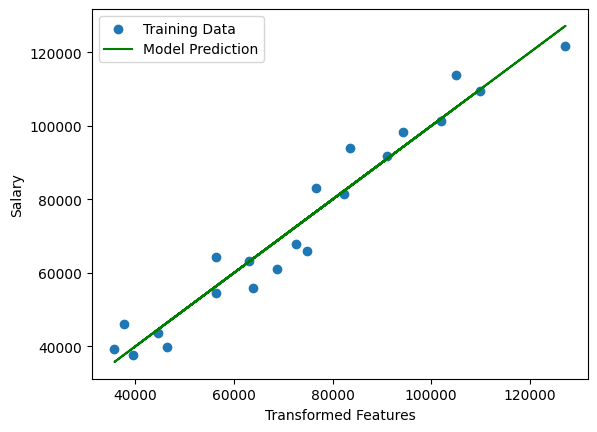

In [45]:
ft = x_train * model.coef_

#ftt = ft['age']+ft['distance']+ft["YearsExperience"]+model.intercept_

ftt = ft.sum(axis=1) + model.intercept_  # Sum across all features and add the intercept

# Ensure ftt has the correct shape to match y_train or y_test
ftt = ftt.values.reshape(-1, 1)  # Reshape if necessary

# Plotting
plt.scatter(ftt, y_train, label='Training Data')
plt.plot(ftt, model.predict(x_train), color='Green', label='Model Prediction')  # Use x_train for consistency
plt.xlabel('Transformed Features')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [47]:
# Create an instance of LinearRegression
regr = LinearRegression()

# Fit the model using the test data
regr.fit(x_test, y_test)

# Calculate and print the test score
print("Test Score =", regr.score(x_test, y_test))


Test Score = 0.9785267270321817
